In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_excel("News_Categories.xlsx")
data = data.sample(frac = 0.10)

In [3]:
data.head()

,Unnamed: 0,category,headline,authors,link,short_description,date
99884,99884,ENTERTAINMENT,Dame Helen Mirren Rides The Subway Like The Re...,Lauren Zupkus,https://www.huffingtonpost.com/entry/helen-mir...,NaN,2015-02-01
169762,169762,WELLNESS,Celebrity Bad Science: Sense About Science Cam...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/celebrity...,"January Jones's dried placenta pills, which th...",2012-12-28
62908,62908,BUSINESS,Why We Need To Slow Down,Jenny Che,https://www.huffingtonpost.com/entry/why-we-ne...,"""The faster the world gets, the more you need ...",2016-03-28
13243,13243,POLITICS,Donald Trump Throws U.S. Generals Under The Bu...,Willa Frej,https://www.huffingtonpost.com/entry/donald-tr...,"And that's not presidential, experts say.",2017-10-26
11382,11382,STYLE,The Most Jaw-Dropping Looks From The 2017 Vict...,Carly Ledbetter,https://www.huffingtonpost.com/entry/2017-vict...,The Angels have landed.,2017-11-20


In [4]:
data.drop(data.columns[data.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)
data.head()

,category,headline,authors,link,short_description,date
99884,ENTERTAINMENT,Dame Helen Mirren Rides The Subway Like The Re...,Lauren Zupkus,https://www.huffingtonpost.com/entry/helen-mir...,NaN,2015-02-01
169762,WELLNESS,Celebrity Bad Science: Sense About Science Cam...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/celebrity...,"January Jones's dried placenta pills, which th...",2012-12-28
62908,BUSINESS,Why We Need To Slow Down,Jenny Che,https://www.huffingtonpost.com/entry/why-we-ne...,"""The faster the world gets, the more you need ...",2016-03-28
13243,POLITICS,Donald Trump Throws U.S. Generals Under The Bu...,Willa Frej,https://www.huffingtonpost.com/entry/donald-tr...,"And that's not presidential, experts say.",2017-10-26
11382,STYLE,The Most Jaw-Dropping Looks From The 2017 Vict...,Carly Ledbetter,https://www.huffingtonpost.com/entry/2017-vict...,The Angels have landed.,2017-11-20


In [5]:
data.drop(['link','date'], axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20085 entries, 99884 to 49223
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           20085 non-null  object
 1   headline           20085 non-null  object
 2   authors            16454 non-null  object
 3   short_description  18100 non-null  object
dtypes: object(4)
memory usage: 784.6+ KB


In [7]:
data.shape

(20085, 4)

In [8]:
data = data.dropna()

In [9]:
data = data.drop_duplicates()

In [10]:
data.head()

,category,headline,authors,short_description
169762,WELLNESS,Celebrity Bad Science: Sense About Science Cam...,"Reuters, Reuters","January Jones's dried placenta pills, which th..."
62908,BUSINESS,Why We Need To Slow Down,Jenny Che,"""The faster the world gets, the more you need ..."
13243,POLITICS,Donald Trump Throws U.S. Generals Under The Bu...,Willa Frej,"And that's not presidential, experts say."
11382,STYLE,The Most Jaw-Dropping Looks From The 2017 Vict...,Carly Ledbetter,The Angels have landed.
166878,TRAVEL,A Pilgrimage Along Perth's Highway To Hell,"Tom Rhodes, Contributor\nComedian, Writer & Wo...","Perth is so far that you could get drunk, sobe..."


In [11]:
set(data['category'])

{'ARTS',
 'ARTS & CULTURE',
 'BLACK VOICES',
 'BUSINESS',
 'COLLEGE',
 'COMEDY',
 'CRIME',
 'CULTURE & ARTS',
 'DIVORCE',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FIFTY',
 'FOOD & DRINK',
 'GOOD NEWS',
 'GREEN',
 'HEALTHY LIVING',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTING',
 'PARENTS',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE',
 'STYLE & BEAUTY',
 'TASTE',
 'TECH',
 'THE WORLDPOST',
 'TRAVEL',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS',
 'WORLDPOST'}

In [12]:
world_news = ['WORLD NEWS', 'THE WORLDPOST', 'WORLDPOST']
lifestyle = ['HOME & LIVING']
entertainment = ['ENTERTAINMENT']
business_economy = ['BUSINESS', 'MONEY']
health = ['WELLNESS','HEALTHY LIVING']
environment = ['GREEN', 'ENVIRONMENT']
tech_science = ['TECH','SCIENCE']
education = ['EDUCATION','COLLEGE']
culture = ['RELIGION', 'ARTS & CULTURE', 'ARTS', 'CULTURE & ARTS']
politic = ['POLITICS']
crime = ['CRIME']
style =['STYLE & BEAUTY','STYLE']
wedding = ['WEDDINGS']
divorce = ['DIVORCE']
parenting = ['PARENTING', 'PARENTS']
food = ['FOOD & DRINK','TASTE']
old_people = ['FIFTY']
travel = ['TRAVEL']
comedy = ['COMEDY']
media = ['MEDIA']
opinion = ['QUEER VOICES', 'BLACK VOICES', 'LATINO VOICES']
sports = ['SPORTS']

In [13]:
categories = data['category'].values
labels = []
for label in categories:
    if label in world_news:
        labels.append('WORLD NEWS')
    elif label in lifestyle: 
        labels.append('LIFESTYLE')
    elif label in entertainment:
        labels.append('ENTERTAINMENT')
    elif label in business_economy:
        labels.append('BUSINESS & ECONOMY')
    elif label in health:
        labels.append('HEALTH')
    elif label in environment:
        labels.append('ENVIRONMENT')
    elif label in tech_science:
        labels.append('TECHNOLOGY & SCIENCE')
    elif label in education:
        labels.append('EDUCATION')
    elif label in culture:
        labels.append('CULTURE')
    elif label in politic:
        labels.append('POLITIC')
    elif label in crime:
        labels.append('CRIME')
    elif label in style:
        labels.append('STYLE')
    elif label in wedding:
        labels.append('WEDDING')
    elif label in divorce:
        labels.append('DIVORCE')
    elif label in parenting:
        labels.append('PARENTING')
    elif label in food:
        labels.append('FOOD')
    elif label in old_people:
        labels.append('OLD PEOPLE')
    elif label in travel:
        labels.append('TRAVEL')
    elif label in comedy:
        labels.append('COMEDY')
    elif label in media:
        labels.append('MEDIA')
    elif label in opinion:
        labels.append('OPINION')
    elif label in sports:
        labels.append('SPORTS')
        
    else:
        labels.append(label)
data['labels'] = labels

In [14]:
data.drop('category', axis = 1, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'HEALTH'),
  Text(1, 0, 'BUSINESS & ECONOMY'),
  Text(2, 0, 'POLITIC'),
  Text(3, 0, 'STYLE'),
  Text(4, 0, 'TRAVEL'),
  Text(5, 0, 'PARENTING'),
  Text(6, 0, 'OLD PEOPLE'),
  Text(7, 0, 'TECHNOLOGY & SCIENCE'),
  Text(8, 0, 'WORLD NEWS'),
  Text(9, 0, 'CULTURE'),
  Text(10, 0, 'EDUCATION'),
  Text(11, 0, 'ENTERTAINMENT'),
  Text(12, 0, 'OPINION'),
  Text(13, 0, 'SPORTS'),
  Text(14, 0, 'GOOD NEWS'),
  Text(15, 0, 'IMPACT'),
  Text(16, 0, 'COMEDY'),
  Text(17, 0, 'WEDDING'),
  Text(18, 0, 'DIVORCE'),
  Text(19, 0, 'FOOD'),
  Text(20, 0, 'MEDIA'),
  Text(21, 0, 'WOMEN'),
  Text(22, 0, 'ENVIRONMENT'),
  Text(23, 0, 'LIFESTYLE'),
  Text(24, 0, 'CRIME'),
  Text(25, 0, 'WEIRD NEWS')])

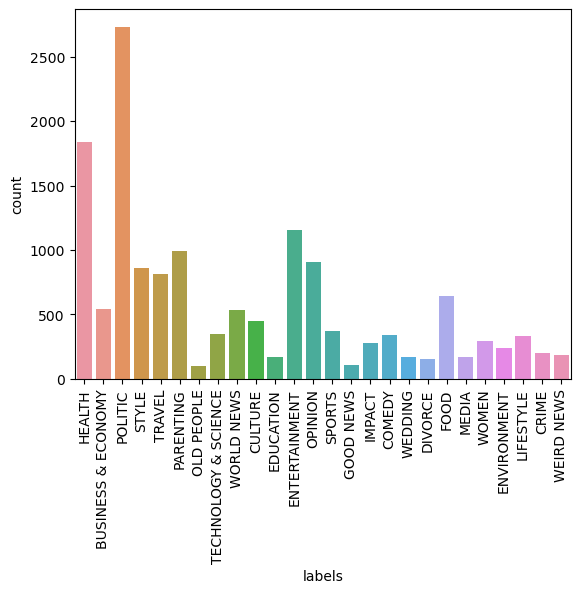

In [15]:
sns.countplot(x = 'labels', data = data)
plt.xticks(rotation = 90)

In [16]:
from sklearn.utils import resample 

style = data[data['labels'] == 'STYLE']
media = data[data['labels']== 'MEDIA']
opinion = data[data['labels']== 'OPINION']
politic = data[data['labels']== 'POLITIC']
entertainment = data[data['labels'] == 'ENTERTAINMENT']
business = data[data['labels']== 'BUSINESS & ECONOMY']
world_news = data[data['labels'] == 'WORLD NEWS']
culture = data[data['labels'] == 'CULTURE']
health = data[data['labels']== 'HEALTH']
education = data[data['labels']== 'EDUCATION']
food = data[data['labels']== 'FOOD']
divorce = data[data['labels']== 'DIVORCE']
crime = data[data['labels']== 'CRIME']
lifestyle = data[data['labels'] == 'LIFESTYLE']
travel = data[data['labels']== 'TRAVEL']
tech_sci = data[data['labels']== 'TECHNOLOGY & SCIENCE']
parenting = data[data['labels']== 'PARENTING']
old_people = data[data['labels']== 'OLD PEOPLE']
sports = data[data['labels']== 'SPORTS']
comedy = data[data['labels']== 'COMEDY']
environment = data[data['labels']== 'ENVIRONMENT']
wedding = data[data['labels']== 'WEDDING']

In [17]:
resampled_entertainment = resample(entertainment,replace = True, n_samples = 2500, random_state = 42)
resampled_lifestyle = resample(lifestyle, replace = True, n_samples = 2500, random_state = 42)
resampled_business = resample( business, replace = True, n_samples = 2500, random_state = 42)
resampled_tech_sci = resample( tech_sci , replace = True, n_samples = 2500, random_state = 42)
resampled_education = resample(education, replace = True, n_samples = 2500, random_state = 42)
resampled_environment = resample(environment, replace = True, n_samples = 2500, random_state = 42)
resampled_health = resample(health, replace =  True, n_samples = 2500, random_state = 42)
resampled_world_news = resample(world_news, replace =  True, n_samples = 2500, random_state = 42)
resampled_style = resample(style,replace = True, n_samples = 2500, random_state = 42)
resampled_media = resample(media, replace = True, n_samples = 2500, random_state = 42)
resampled_opinion = resample( opinion, replace = True, n_samples = 2500, random_state = 42)
resampled_politic = resample( politic , replace = True, n_samples = 2500, random_state = 42)
resampled_culture = resample(culture, replace = True, n_samples = 2500, random_state = 42)
resampled_food = resample(food, replace = True, n_samples = 2500, random_state = 42)
resampled_divorce = resample(divorce, replace =  True, n_samples = 2500, random_state = 42)
resampled_wedding = resample(wedding, replace =  True, n_samples = 2500, random_state = 42)
resampled_comedy = resample(comedy,replace = True, n_samples = 2500, random_state = 42)
resampled_sports = resample(sports, replace = True, n_samples = 2500, random_state = 42)
resampled_old_people = resample( old_people, replace = True, n_samples = 2500, random_state = 42)
resampled_parenting = resample( parenting , replace = True, n_samples = 2500, random_state = 42)
resampled_travel = resample(travel, replace = True, n_samples = 2500, random_state = 42)
resampled_crime = resample(crime, replace = True, n_samples = 2500, random_state = 42)



In [18]:
balanced_data = pd.concat([resampled_entertainment, resampled_lifestyle, resampled_business,resampled_tech_sci,
                       resampled_education, resampled_environment, resampled_health,resampled_world_news, resampled_style,
                       resampled_media,resampled_opinion,resampled_politic,resampled_culture, resampled_food,resampled_divorce,
                       resampled_wedding, resampled_comedy, resampled_sports, resampled_old_people,resampled_parenting,
                        resampled_travel,resampled_crime  ])

C:\Users\boure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'ENTERTAINMENT'),
  Text(1, 0, 'LIFESTYLE'),
  Text(2, 0, 'BUSINESS & ECONOMY'),
  Text(3, 0, 'TECHNOLOGY & SCIENCE'),
  Text(4, 0, 'EDUCATION'),
  Text(5, 0, 'ENVIRONMENT'),
  Text(6, 0, 'HEALTH'),
  Text(7, 0, 'WORLD NEWS'),
  Text(8, 0, 'STYLE'),
  Text(9, 0, 'MEDIA'),
  Text(10, 0, 'OPINION'),
  Text(11, 0, 'POLITIC'),
  Text(12, 0, 'CULTURE'),
  Text(13, 0, 'FOOD'),
  Text(14, 0, 'DIVORCE'),
  Text(15, 0, 'WEDDING'),
  Text(16, 0, 'COMEDY'),
  Text(17, 0, 'SPORTS'),
  Text(18, 0, 'OLD PEOPLE'),
  Text(19, 0, 'PARENTING'),
  Text(20, 0, 'TRAVEL'),
  Text(21, 0, 'CRIME')])

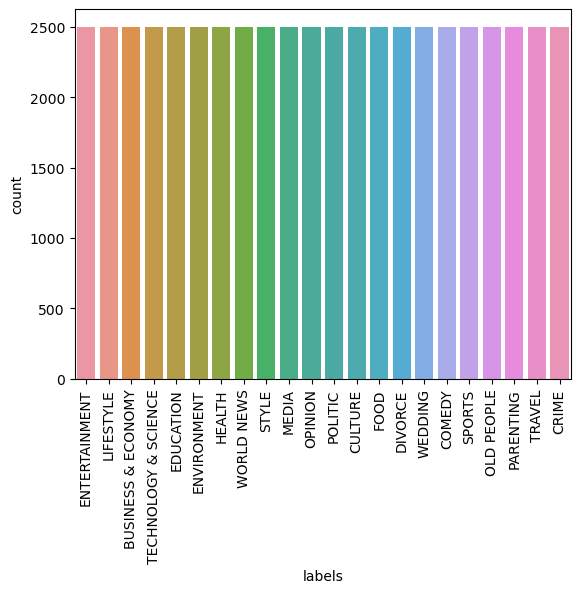

In [19]:
sns.countplot('labels', data = balanced_data)
plt.xticks(rotation = 90)

In [20]:
balanced_data.shape

(55000, 4)

In [21]:
balanced_data.head()

,headline,authors,short_description,labels
49424,Here's What Britney Spears Looked Like At Her ...,Jillian Capewell,Snakeskin pants and all.,ENTERTAINMENT
146506,Best of Venice: Nobody's Home - Portrait of a ...,"E. Nina Rothe, Contributor\nCultural Activist",The strengths of Nobody's Home as a cinematic ...,ENTERTAINMENT
83430,'The Gift' Just Keeps On Giving,"Jackie K. Cooper, ContributorFilm Critic","""The Gift"" is a movie that just keeps on givin...",ENTERTAINMENT
92722,Podcast Review: First Laughs With Jason Crane,"Marc Hershon, ContributorBranding expert and c...",Host Jason Crane is an experienced podcaster (...,ENTERTAINMENT
16009,"'South Park' Finally Attacks Trump Again, Focu...",Todd Van Luling,The show still isn't using the president's name.,ENTERTAINMENT


In [22]:
import re 
from string import punctuation 
import nltk 
nltk.download('punkt')
def pre1(text):
    #text = str(text)
    #nocase = text.lower()
    nopunc = re.sub(f"[{re.escape(punctuation)})]", "" , text)
    no_special_character = re.sub(r'[^a-zA-Z0-9\s]',"", nopunc)
    text1 = " ".join(no_special_character.split())
    return text1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\boure\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
def pre2(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed = [ stemmer.stem(x) for x in tokens]
    text2 = " ".join(stemmed)
    return text2

In [24]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
def pre3(text):
    tokens = word_tokenize(text)
    lem = WordNetLemmatizer()
    lemmatized = [ lem.lemmatize(x) for x in tokens ]
    text3 = " ".join(lemmatized)
    return text3

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\boure\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopwords_set():
    return set(stopwords.words('english'))
def pre4(text):
    stopwrds = stopwords_set()
    tokens = word_tokenize(text)
    pretext4 = [ x for x in tokens if x not in stopwrds]
    text4 = " ".join(pretext4)
    return text4

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boure\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def text_cleaning(text):
    X = pre1(text)
    X = pre2(X)
   # X = pre4(X) # stopword
    X = pre3(X) # lemmatization
    return X 

In [27]:
balanced_data['short_description'] = balanced_data['short_description'].apply(lambda x: text_cleaning(x))

In [28]:
balanced_data['short_description']

49424                                snakeskin pant and all
146506    the strength of nobodi home a a cinemat work a...
83430     the gift is a movi that just keep on give righ...
92722     host jason crane is an experienc podcast he ho...
16009               the show still isnt use the presid name
                                ...                        
125414    you go through littl town and see peopl with t...
65968     gregori jennrich 31 ha been charg with feloni ...
94373     i wa a polic canin handler for 8 year my dog b...
170034    the soldier appear to have die from a gunshot ...
62450           the beat left the victim with seriou injuri
Name: short_description, Length: 55000, dtype: object

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
y = encoder.fit_transform(balanced_data['labels'])


In [32]:
from sklearn.feature_extraction.text import HashingVectorizer 
vectorizer = HashingVectorizer(n_features = 1000)
X = vectorizer.fit_transform(balanced_data['short_description'])
X.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.09901475,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, preds1)
class_report = classification_report(y_test, preds1)

print(f"The accuracy is: {acc1}")
print(f"The full details: \n {class_report}")

The accuracy is: 0.8188181818181818
The full details: 
               precision    recall  f1-score   support

           0       0.72      0.89      0.80       537
           1       0.57      0.98      0.72       495
           2       0.96      1.00      0.98       508
           3       0.82      0.91      0.86       512
           4       0.98      1.00      0.99       489
           5       0.98      1.00      0.99       483
           6       0.51      0.63      0.56       500
           7       0.96      0.99      0.98       496
           8       0.91      0.79      0.85       513
           9       0.65      0.35      0.45       480
          10       0.97      0.97      0.97       508
          11       0.95      1.00      0.98       481
          12       0.96      1.00      0.98       490
          13       0.79      0.68      0.73       492
          14       0.79      0.57      0.66       490
          15       0.78      0.21      0.33       503
          16       0.91  

C:\Users\boure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, preds2)
class_report = classification_report(y_test, preds2)
print(f"The accuracy is: {acc2}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9410909090909091
The full details: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       537
           1       0.94      0.98      0.96       495
           2       0.97      1.00      0.98       508
           3       0.94      0.99      0.96       512
           4       0.98      1.00      0.99       489
           5       0.98      1.00      0.99       483
           6       0.87      0.86      0.87       500
           7       0.96      1.00      0.98       496
           8       0.94      0.95      0.94       513
           9       0.86      0.74      0.80       480
          10       0.95      1.00      0.97       508
          11       0.97      1.00      0.98       481
          12       0.98      1.00      0.99       490
          13       0.91      0.90      0.91       492
          14       0.91      0.89      0.90       490
          15       0.86      0.59      0.70       503
          16       0.97   

In [36]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)
acc3 = accuracy_score(y_test, preds3)
class_report = classification_report(y_test, preds3)
print(f"The accuracy is: {acc3}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9428181818181818
The full details: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       537
           1       0.97      0.99      0.98       495
           2       0.99      1.00      0.99       508
           3       0.97      0.97      0.97       512
           4       1.00      1.00      1.00       489
           5       0.99      1.00      0.99       483
           6       0.80      0.85      0.83       500
           7       0.99      0.99      0.99       496
           8       0.96      0.95      0.96       513
           9       0.78      0.81      0.79       480
          10       0.99      0.99      0.99       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.92      0.83      0.87       492
          14       0.89      0.87      0.88       490
          15       0.76      0.77      0.76       503
          16       0.99   

In [37]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
preds4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, preds4)
class_report = classification_report(y_test, preds4)
print(f"The accuracy is: {acc4}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.96
The full details: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       537
           1       0.97      0.99      0.98       495
           2       0.99      1.00      1.00       508
           3       0.99      0.99      0.99       512
           4       0.99      1.00      1.00       489
           5       0.98      1.00      0.99       483
           6       0.88      0.88      0.88       500
           7       1.00      1.00      1.00       496
           8       0.98      0.96      0.97       513
           9       0.82      0.86      0.84       480
          10       0.99      1.00      0.99       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.95      0.91      0.93       492
          14       0.91      0.92      0.92       490
          15       0.81      0.81      0.81       503
          16       1.00      1.00      1

In [38]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(balanced_data['short_description'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, preds1)
class_report = classification_report(y_test, preds1)

print(f"The accuracy is: {acc1}")
print(f"The full details: \n {class_report}")

The accuracy is: 0.7905454545454546
The full details: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       537
           1       0.53      0.98      0.69       495
           2       0.88      1.00      0.94       508
           3       0.83      0.88      0.85       512
           4       0.97      1.00      0.99       489
           5       0.96      1.00      0.98       483
           6       0.42      0.58      0.49       500
           7       0.95      0.99      0.97       496
           8       0.76      0.72      0.74       513
           9       0.83      0.25      0.39       480
          10       0.87      0.97      0.92       508
          11       0.92      1.00      0.96       481
          12       1.00      1.00      1.00       490
          13       0.60      0.63      0.61       492
          14       0.86      0.53      0.66       490
          15       0.64      0.17      0.28       503
          16       0.64  

C:\Users\boure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, preds2)
class_report = classification_report(y_test, preds2)
print(f"The accuracy is: {acc2}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9481818181818182
The full details: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       537
           1       0.95      0.98      0.96       495
           2       0.96      1.00      0.98       508
           3       0.97      0.99      0.98       512
           4       0.98      1.00      0.99       489
           5       0.99      1.00      0.99       483
           6       0.88      0.88      0.88       500
           7       0.97      1.00      0.99       496
           8       0.95      0.95      0.95       513
           9       0.89      0.78      0.83       480
          10       0.97      1.00      0.98       508
          11       0.97      1.00      0.99       481
          12       0.98      1.00      0.99       490
          13       0.91      0.90      0.90       492
          14       0.93      0.91      0.92       490
          15       0.85      0.65      0.74       503
          16       0.98   

In [42]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)
acc3 = accuracy_score(y_test, preds3)
class_report = classification_report(y_test, preds3)
print(f"The accuracy is: {acc3}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9123636363636364
The full details: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       537
           1       0.73      0.98      0.84       495
           2       0.97      1.00      0.99       508
           3       0.98      0.92      0.95       512
           4       1.00      1.00      1.00       489
           5       1.00      1.00      1.00       483
           6       0.57      0.82      0.67       500
           7       1.00      0.99      0.99       496
           8       0.95      0.89      0.92       513
           9       0.82      0.80      0.81       480
          10       0.96      0.95      0.95       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.87      0.75      0.81       492
          14       0.91      0.85      0.88       490
          15       0.75      0.68      0.71       503
          16       0.93   

In [43]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
preds4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, preds4)
class_report = classification_report(y_test, preds4)
print(f"The accuracy is: {acc4}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9632727272727273
The full details: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       537
           1       0.96      0.98      0.97       495
           2       0.99      1.00      0.99       508
           3       0.99      0.99      0.99       512
           4       1.00      1.00      1.00       489
           5       0.99      1.00      0.99       483
           6       0.85      0.91      0.88       500
           7       1.00      1.00      1.00       496
           8       0.98      0.97      0.97       513
           9       0.86      0.86      0.86       480
          10       0.99      1.00      1.00       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.94      0.91      0.92       492
          14       0.95      0.93      0.94       490
          15       0.83      0.83      0.83       503
          16       0.98   

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(balanced_data['short_description'])
X.toarray()
vectorizer.vocabulary_.keys()

dict_keys(['snakeskin', 'pant', 'and', 'all', 'the', 'strength', 'of', 'nobodi', 'home', 'cinemat', 'work', 'are', 'plenti', 'but', 'what', 'appeal', 'to', 'me', 'wa', 'perfect', 'insight', 'into', 'dysfunct', 'famili', 'which', 'ill', 'make', 'bold', 'statement', 'here', 'most', 'live', 'in', 'modern', 'world', 'belong', 'gift', 'is', 'movi', 'that', 'just', 'keep', 'on', 'give', 'right', 'up', 'last', 'frame', 'film', 'it', 'audienc', 'solid', 'plot', 'well', 'act', 'charact', 'enough', 'twist', 'turn', 'excit', 'build', 'host', 'jason', 'crane', 'an', 'experienc', 'podcast', 'he', 'over', '450', 'episod', 'jazz', 'session', 'brand', 'new', 'standup', 'veri', 'launch', 'first', 'laugh', 'way', 'chronicl', 'hi', 'foray', 'art', 'form', 'show', 'still', 'isnt', 'use', 'presid', 'name', 'seem', 'delici', 'idea', 'see', 'edward', 'albe', 'toni', 'awardwin', 'play', 'talk', 'back', 'at', 'who', 'afraid', 'virginia', 'woolf', 'about', 'georg', 'martha', 'univers', 'coupl', 'whose', 'marria

In [45]:
X

<55000x17076 sparse matrix of type '<class 'numpy.float64'>'
	with 1100817 stored elements in Compressed Sparse Row format>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, preds1)
class_report = classification_report(y_test, preds1)

print(f"The accuracy is: {acc1}")
print(f"The full details: \n {class_report}")

The accuracy is: 0.8300909090909091
The full details: 
               precision    recall  f1-score   support

           0       0.67      0.94      0.78       537
           1       0.52      0.98      0.68       495
           2       0.99      1.00      1.00       508
           3       0.87      0.94      0.90       512
           4       1.00      1.00      1.00       489
           5       1.00      1.00      1.00       483
           6       0.46      0.67      0.55       500
           7       1.00      0.99      1.00       496
           8       0.96      0.80      0.87       513
           9       0.99      0.31      0.47       480
          10       0.99      0.97      0.98       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.89      0.67      0.77       492
          14       0.99      0.58      0.73       490
          15       0.82      0.24      0.37       503
          16       0.98  

C:\Users\boure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(0.0, 22.0, 22.0, 0.0)

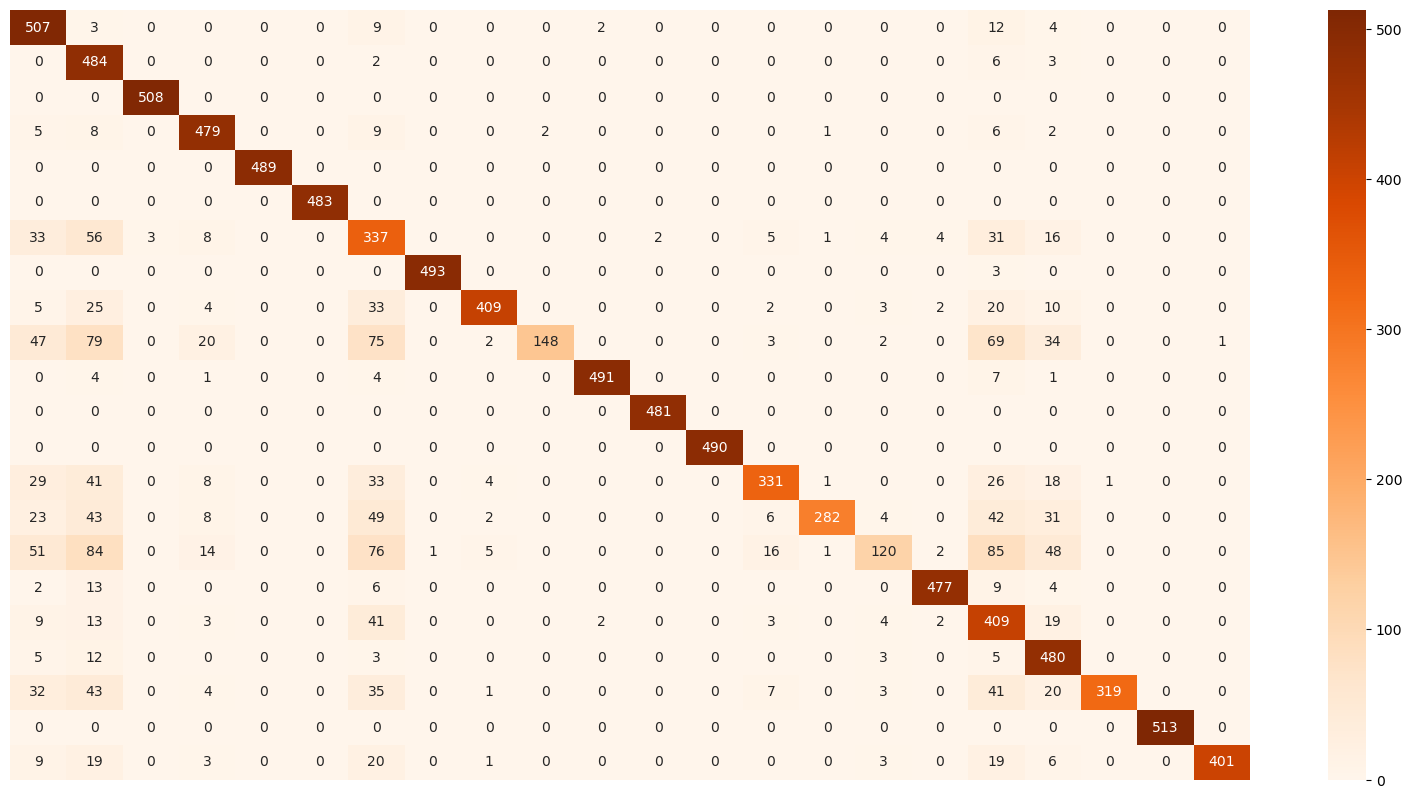

In [48]:
cf = confusion_matrix(y_test, preds1)
plt.figure(figsize = (20,10))
sns.heatmap(cf, annot = True, fmt = 'd', cmap = 'Oranges')
plt.axis(False)

In [49]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, preds2)
class_report = classification_report(y_test, preds2)
print(f"The accuracy is: {acc2}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9477272727272728
The full details: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       537
           1       0.95      0.98      0.97       495
           2       0.97      1.00      0.99       508
           3       0.96      0.99      0.98       512
           4       0.99      1.00      0.99       489
           5       0.98      1.00      0.99       483
           6       0.88      0.87      0.87       500
           7       0.98      1.00      0.99       496
           8       0.93      0.95      0.94       513
           9       0.89      0.77      0.83       480
          10       0.97      1.00      0.98       508
          11       0.98      1.00      0.99       481
          12       0.98      1.00      0.99       490
          13       0.90      0.91      0.91       492
          14       0.93      0.91      0.92       490
          15       0.85      0.67      0.75       503
          16       0.98   

(0.0, 22.0, 22.0, 0.0)

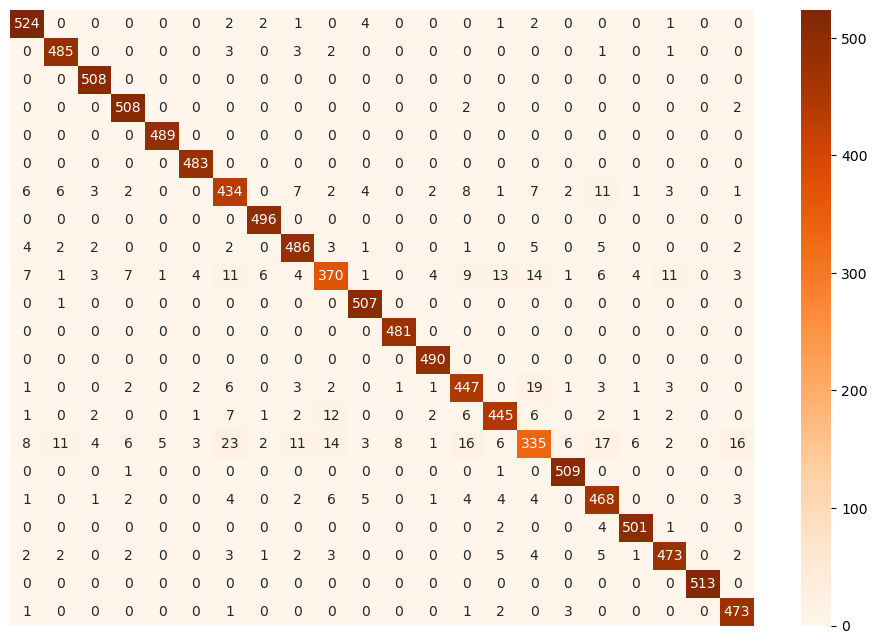

In [50]:
cf = confusion_matrix(y_test, preds2)
plt.figure(figsize = (12,8))
sns.heatmap(cf, annot = True, fmt = 'd', cmap = 'Oranges')
plt.axis(False)

In [51]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)
acc3 = accuracy_score(y_test, preds3)
class_report = classification_report(y_test, preds3)
print(f"The accuracy is: {acc3}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9661818181818181
The full details: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       537
           1       0.99      0.98      0.98       495
           2       0.99      1.00      1.00       508
           3       1.00      0.99      1.00       512
           4       1.00      1.00      1.00       489
           5       1.00      1.00      1.00       483
           6       0.85      0.91      0.88       500
           7       1.00      1.00      1.00       496
           8       0.99      0.96      0.98       513
           9       0.85      0.89      0.87       480
          10       0.99      1.00      0.99       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.94      0.90      0.92       492
          14       0.94      0.92      0.93       490
          15       0.83      0.85      0.84       503
          16       0.99   

In [52]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
preds4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, preds4)
class_report = classification_report(y_test, preds4)
print(f"The accuracy is: {acc4}")
print(f"The full details: \n{class_report}")

The accuracy is: 0.9648181818181818
The full details: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       537
           1       0.97      0.98      0.97       495
           2       0.99      1.00      1.00       508
           3       1.00      0.99      1.00       512
           4       1.00      1.00      1.00       489
           5       0.98      1.00      0.99       483
           6       0.87      0.91      0.89       500
           7       1.00      1.00      1.00       496
           8       0.99      0.96      0.98       513
           9       0.85      0.87      0.86       480
          10       0.99      1.00      0.99       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.95      0.91      0.93       492
          14       0.95      0.94      0.94       490
          15       0.81      0.84      0.83       503
          16       0.99   

In [53]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, preds1)
class_report = classification_report(y_test, preds1)

print(f"The accuracy is: {acc1}")
print(f"The full details: \n {class_report}")

The accuracy is: 0.8324545454545454
The full details: 
               precision    recall  f1-score   support

           0       0.68      0.95      0.79       537
           1       0.52      0.98      0.68       495
           2       0.99      1.00      1.00       508
           3       0.86      0.94      0.89       512
           4       1.00      1.00      1.00       489
           5       1.00      1.00      1.00       483
           6       0.47      0.71      0.57       500
           7       1.00      0.99      1.00       496
           8       0.96      0.79      0.87       513
           9       0.99      0.31      0.47       480
          10       0.99      0.97      0.98       508
          11       1.00      1.00      1.00       481
          12       1.00      1.00      1.00       490
          13       0.89      0.68      0.77       492
          14       0.99      0.58      0.73       490
          15       0.81      0.24      0.37       503
          16       0.98  

C:\Users\boure\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
accuracy_summary = {"KNN": [f'{acc1}'], "Decision Tree": [f'{acc2}'], "SVC":[ f'{acc3}'], "Random Forest":[[f'{acc4}']]}
acc_summary = pd.DataFrame(accuracy_summary)
acc_summary.index.name = 'Accuracy'
acc_summary

,KNN,Decision Tree,SVC,Random Forest
Accuracy,,,,
0,0.8324545454545454,0.9477272727272728,0.9661818181818181,[0.9648181818181818]


In [55]:
text = ["Vintage fashion makes a comeback as modern style embraces retro aesthetics."]

In [56]:
X_custom = vectorizer.transform(text)
X_custom



<1x17076 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [58]:
classes = encoder.classes_

In [59]:
print(f"The predicted category is: {classes[model3.predict(X_custom)[0]]}")

The predicted category is: STYLE
